In [151]:
import pandas as pd
import numpy as np

r = np.array([[-0.437075,  -0.437075,  0.630795 ],
         [0.826268,  0.563277,  0 ],
         [0.355312,  -0.521205,  0.77595]])

#read in file
xyz = pd.read_csv('output_xyz.txt', sep = " ", names = ['X', "Y", "Z", "NA"])
#convert to numpy array
xyz = xyz.drop(columns = ['NA'], axis = 1).to_numpy()
xyz = np.matmul(np.array(xyz),r)

#read in file
true_pos = pd.read_csv('true pos.txt', names = ['X', "Y", "Z"])
#convert to numpy array
true_pos = np.matmul(true_pos.to_numpy(),r)

#true - estimate
res = true_pos - xyz

#read in file
stdv = pd.read_csv('output_stdev.txt', sep = " ", names = ['X', "Y", "Z", "NA"])
#convert to numpy array
stdv = stdv.drop(columns = ['NA'], axis = 1).to_numpy()

array([[1.413, 1.043, 1.248],
       [1.413, 1.043, 1.248],
       [1.413, 1.043, 1.248],
       ...,
       [0.792, 0.721, 0.816],
       [0.792, 0.721, 0.816],
       [0.792, 0.721, 0.816]])

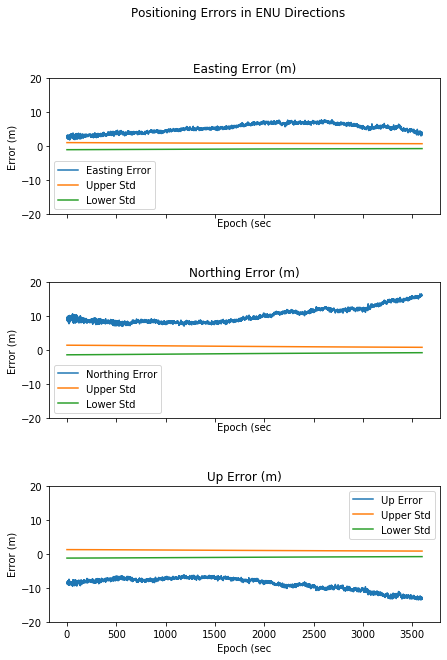

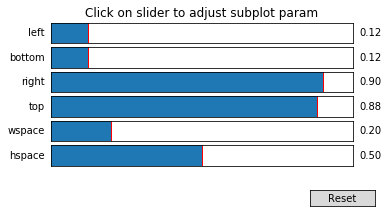

In [152]:
#2.2 and 2.3


import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Positioning Errors in ENU Directions')
fig.set_size_inches(7, 10)


#X Error
axs[0].plot(res[:,0], label = 'Easting Error')
axs[0].plot(stdv[:,1], label = 'Upper Std')
axs[0].plot(-1*stdv[:,1], label = 'Lower Std')
axs[0].set_title('Easting Error (m)')
axs[0].set_ylabel('Error (m)')
axs[0].set_xlabel('Epoch (sec')
axs[0].legend()
#axs[0].xlabel('Epoch (sec)')
#axs[0].ylabel('Error (m)')

#Y Error
axs[1].plot(res[:,1], label = 'Northing Error')
axs[1].plot(stdv[:,0], label = 'Upper Std')
axs[1].plot(-1*stdv[:,0], label = 'Lower Std')
axs[1].set_title('Northing Error (m)')
axs[1].set_ylabel('Error (m)')
axs[1].set_xlabel('Epoch (sec')
axs[1].legend()

#Z Error
axs[2].plot(res[:,2], label = 'Up Error')
axs[2].plot(stdv[:,2], label = 'Upper Std')
axs[2].plot(-1*stdv[:,2], label = 'Lower Std')
axs[2].set_title('Up Error (m)')
axs[2].set_ylabel('Error (m)')
axs[2].set_xlabel('Epoch (sec')
axs[2].legend()
#axs[2].ylim

#matplotlib adjustments
plt.ylim([-20,20]);
plt.subplots_adjust(hspace = .5)

plt.legend()
plt.subplot_tool()

plt.savefig("Positioning_Errors_in_ENU.jpg", dpi = 100)

Text(0.5, 0, 'Epoch (sec)')

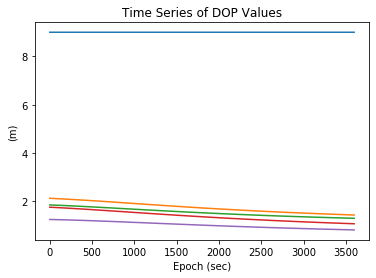

In [153]:
#2.4
#read in file
dop = pd.read_csv('output_dop.txt', sep = " ", names = ['Sat', "GDOP", "PDOP", "HDOP", "VDOP", "NA"])
#convert to numpy array
dop = dop.drop(columns = ['NA'], axis = 1).to_numpy()

dop

fig, ax = plt.subplots()
ax.plot(dop[:,0], label = 'Number of Satelites')
ax.plot(dop[:,1], label =  'GDOP')
ax.plot(dop[:,2], label = 'PDOP')
ax.plot(dop[:,3], label = 'HDOP')
ax.plot(dop[:,4], label = 'VDOP')

ax.set_title('Time Series of DOP Values')
ax.set_ylabel('(m)')
ax.set_xlabel('Epoch (sec)')

plt.savefig("Time_Series_of_DOP_Values.jpg", dpi = 100)

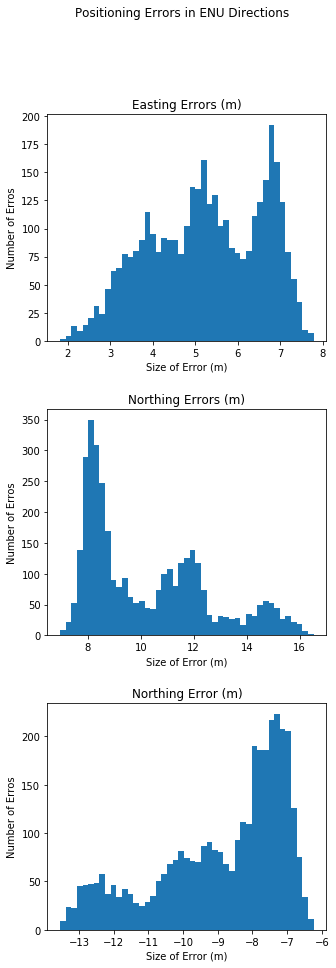

In [162]:
#3.1

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3)
fig.suptitle('Positioning Errors in ENU Directions')
fig.set_size_inches(5, 15)

plt.xlabel('Epoch (sec)')
plt.ylabel('Error (m)')


#X Error
axs[0].hist(res[:,0],bins=45)
axs[0].set_title('Easting Errors (m)')
axs[0].set_ylabel('Number of Erros')
axs[0].set_xlabel('Size of Error (m)')


#Y Error
axs[1].hist(res[:,1],bins=45)
axs[1].set_title('Northing Errors (m)')
axs[1].set_ylabel('Number of Erros')
axs[1].set_xlabel('Size of Error (m)')

#Z Error
axs[2].hist(res[:,2],bins=45)
axs[2].set_title('Up Errors (m)')
axs[2].set_title('Northing Error (m)')
axs[2].set_ylabel('Number of Erros')
axs[2].set_xlabel('Size of Error (m)')

#matplotlib adjustments
plt.subplots_adjust(hspace = .3)

plt.savefig("Positioning_Errors_in_ENU.jpg", dpi = 100)

In [156]:
import math as m
#3.2
#Max Abs Error
#X
print("Easting max abs error: " + str(max(res[:,0].min(), res[:,0].max(), key=abs)))
print("Northing max abs error: " + str(max(res[:,1].min(), res[:,1].max(), key=abs)))
print("Up max abs error: " + str(-1*max(res[:,2].min(), res[:,2].max(), key=abs)))

print("__________________________________")
#Mean Error
print("Easting average error: " + str(np.average(res[:,0])))
print("Northing average error: " + str(np.average(res[:,1])))
print("Up average error: " + str(np.average(res[:,2])))

print("__________________________________")
#StdDev of X,Y,Z
print("Easting std: " + str(np.std(res[:,0])))
print("Northing std: " + str(np.std(res[:,1])))
print("Up std: " + str(np.std(res[:,2])))

print("__________________________________")
#RMS of X,Y,Z
print("Easting RMS: " + str(m.sqrt(np.sum(res[:,0]*res[:,0])/3600)))
print("Northing RMS: " + str(m.sqrt(np.sum(res[:,0]*res[:,0])/3600)))
print("Up RMS: " + str(m.sqrt(np.sum(res[:,0]*res[:,0])/3600)))


Easting max abs error: 7.78518639691174
Northing max abs error: 16.527510573156178
Up max abs error: 13.548991206567734
__________________________________
Easting average error: 5.26175391576725
Northing average error: 10.229268415456689
Up average error: -8.87036812481134
__________________________________
Easting std: 1.326038682504354
Northing std: 2.312897112118768
Up std: 1.837108643886902
__________________________________
Easting RMS: 5.4262724643709035
Northing RMS: 5.4262724643709035
Up RMS: 5.4262724643709035
